# Academic Data - Research Questions 

### 1. Can we build machine learning models that predict the binary outcome of dropout vs. graduate (retention)?  
### 2. How predictive of retention are age, 2nd semester grade, parents' education, and previous qualification grade? 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Load Data

In [2]:
data = pd.read_csv('Student_success_data.csv')

In [3]:
data.head()

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_grade,nacionality,mother's_qualification,father's_qualification,...,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Explore and Clean Dataset

In [4]:
df = data[data['target'] != 'Enrolled']
df.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance', 'previous_qualification',
       'previous_qualification_grade', 'nacionality', 'mother's_qualification',
       'father's_qualification', 'mother's_occupation', 'father's_occupation',
       'admission_grade', 'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem

In [5]:
df = df.drop(columns=[
    'curricular_units_1st_sem_credited',
    'curricular_units_1st_sem_enrolled',
    'curricular_units_1st_sem_evaluations',
    'curricular_units_1st_sem_approved',
    'curricular_units_1st_sem_grade',
    'curricular_units_1st_sem_without_evaluations',
    'curricular_units_2nd_sem_credited',
    'curricular_units_2nd_sem_enrolled',
    'curricular_units_2nd_sem_evaluations',
    'curricular_units_2nd_sem_approved',
    'curricular_units_2nd_sem_without_evaluations'
])

In [6]:
df.rename(columns={'mother\'s_occupation': 'mother_occ', 'father\'s_occupation': 'father_occ'}, inplace=True)

In [7]:
df.isnull().values.any()

False

In [8]:
df['age_at_enrollment'].unique()

array([20, 19, 45, 50, 18, 22, 21, 34, 37, 43, 55, 39, 29, 24, 27, 23, 33,
       35, 25, 26, 44, 36, 28, 38, 30, 47, 31, 32, 40, 48, 49, 46, 41, 70,
       60, 53, 51, 52, 54, 42, 61, 58, 59, 17, 57, 62], dtype=int64)

# Logistic Regression

In [9]:
#Train Model
X = df[['age_at_enrollment','mother_occ', 'father_occ', 'curricular_units_2nd_sem_grade', 'previous_qualification_grade']]
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=8)

In [10]:
#Fit Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [11]:
#Predict on Test Data

y_pred = logreg.predict(X_test)

In [12]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7926008968609866
Confusion Matrix:
 [[197 147]
 [ 38 510]]
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.84      0.57      0.68       344
    Graduate       0.78      0.93      0.85       548

    accuracy                           0.79       892
   macro avg       0.81      0.75      0.76       892
weighted avg       0.80      0.79      0.78       892



### *Model predicts retention well

# Additional Exploration via Plotting

<Axes: xlabel='target', ylabel='count'>

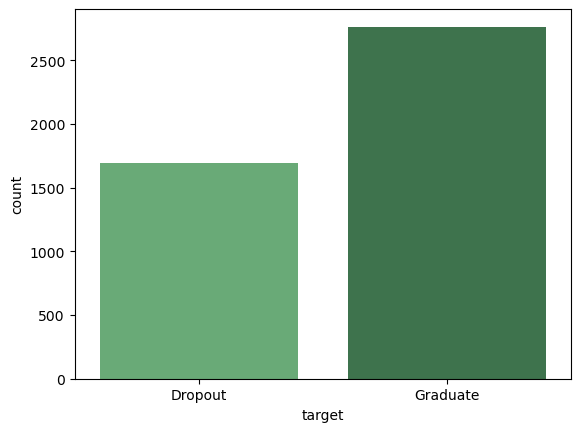

In [13]:
#Exploring Grad/Dropout distribution

sns.countplot(x='target', data=df, palette="Greens_d")


C:\Users\Joe G\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Pairplot of Variables')

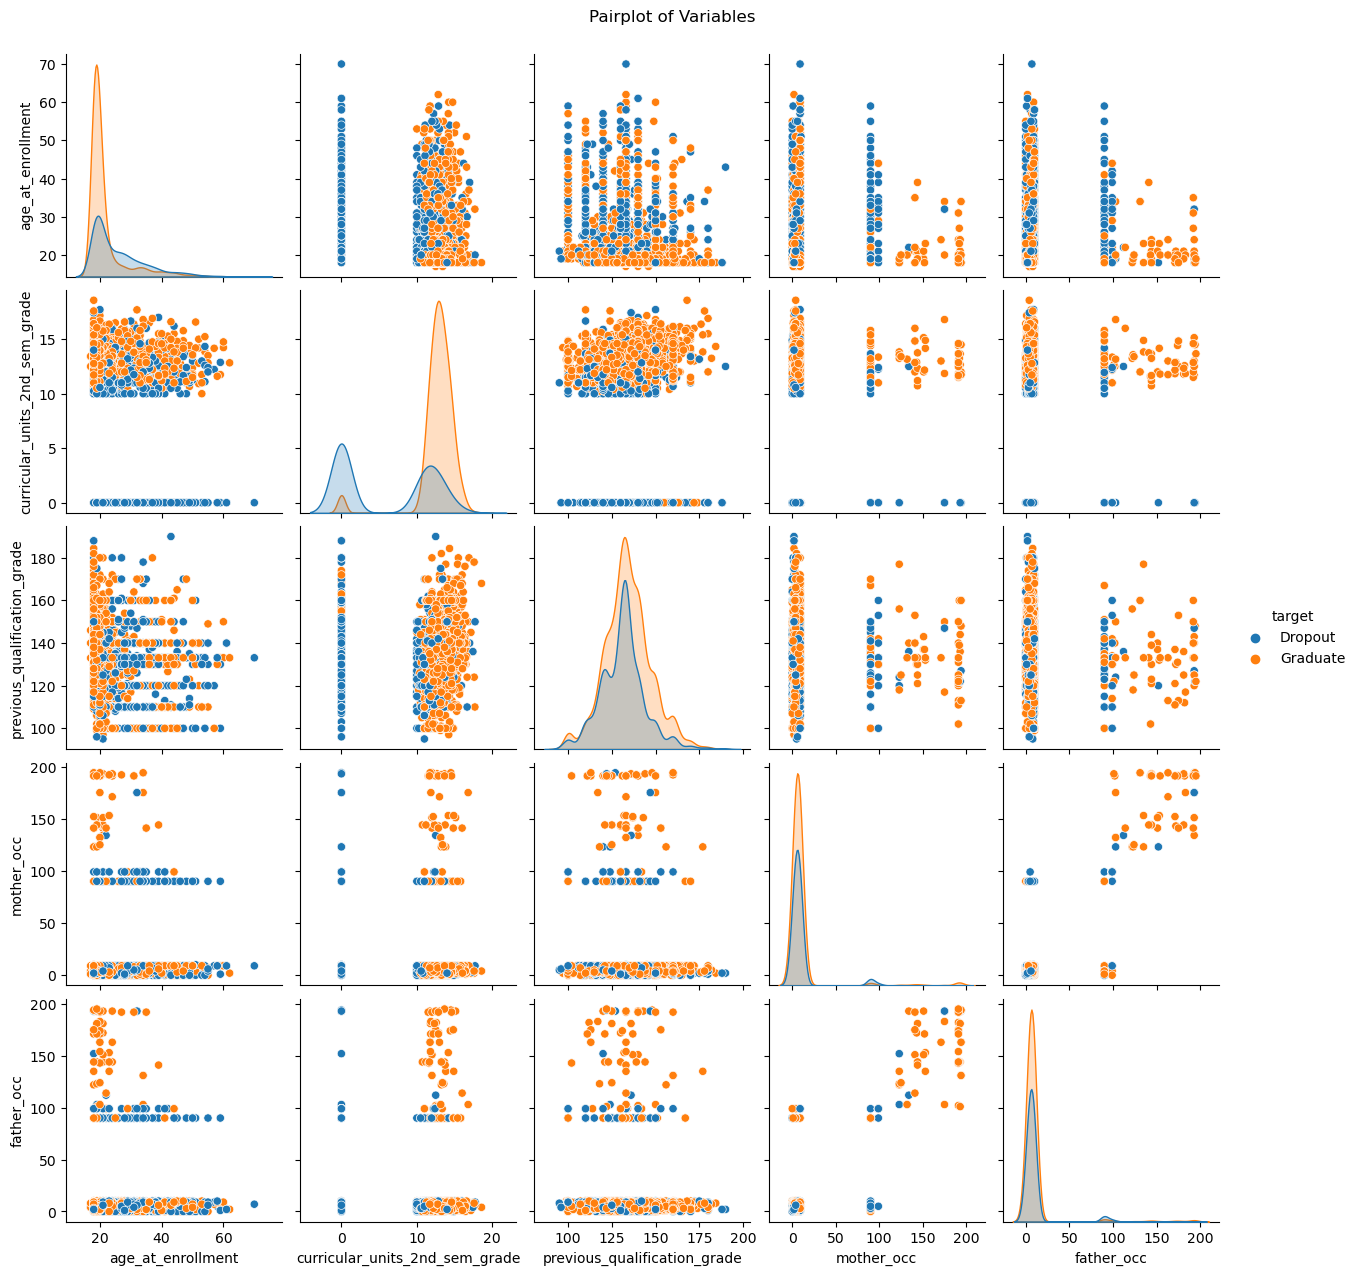

In [14]:
#Pairplot for all variables of interest
s = sns.pairplot(df, vars=['age_at_enrollment', 'curricular_units_2nd_sem_grade', 'previous_qualification_grade', 'mother_occ', 'father_occ'], hue='target')
s.fig.suptitle('Pairplot of Variables', y=1.02)


# Correlation 

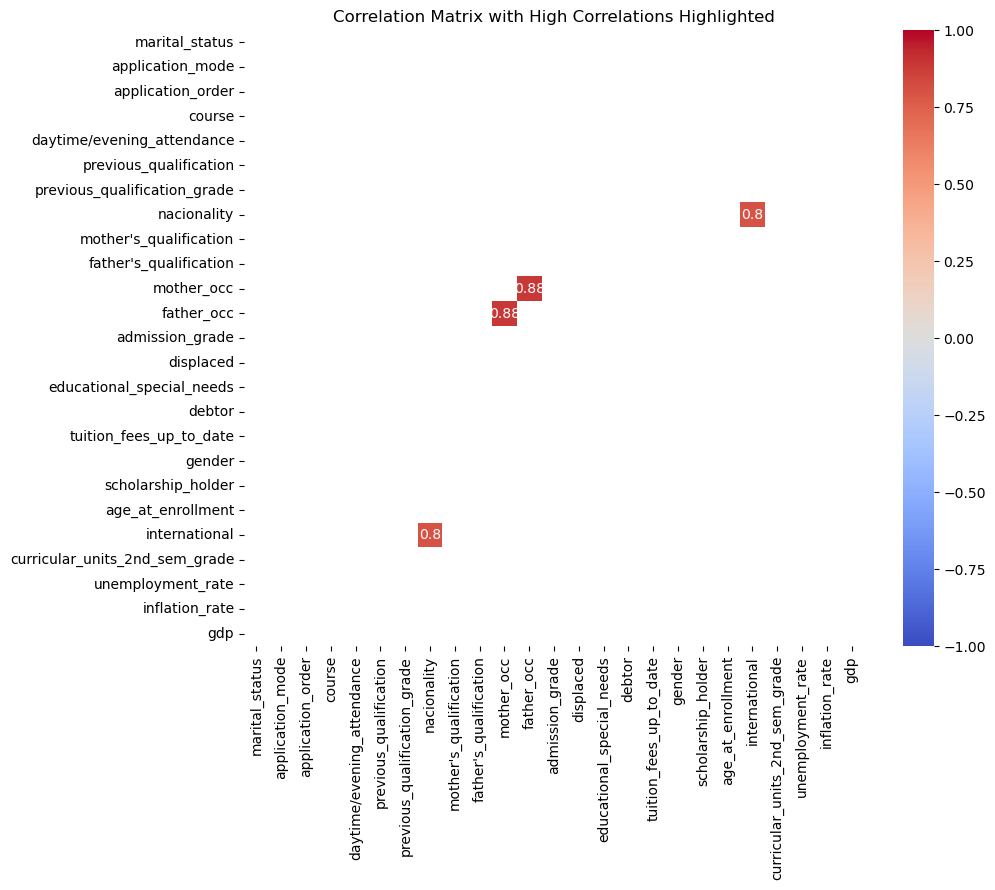

In [15]:
# Compute the correlation matrix
corr = df.corr(numeric_only='True')

# Create a mask to highlight high correlations
mask = (abs(corr) <= 0.7) | (abs(corr) >= 1.0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
plt.title('Correlation Matrix with High Correlations Highlighted')
plt.show()

# Prep Data for Linear Regression 

In [16]:
df['target'].unique()

array(['Dropout', 'Graduate'], dtype=object)

In [17]:
#Remap binary categorical variable to numeric

def map_function(x):
    if x == 'Dropout':
        return 0
    elif x == 'Graduate':
        return 1
    else:
        return -1  # Or some other default value/error indicator

df['target_num'] = df['target'].apply(map_function)

## Linear Regression 

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
#Train Model
XX = df[['age_at_enrollment', 'mother_occ', 'father_occ', 'curricular_units_2nd_sem_grade', 'previous_qualification_grade', 'gender']]

yy = df['target_num']

from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.2, random_state=0)

In [20]:
#Fit Model
lr=LinearRegression()
lr.fit(XX_train, yy_train)

LinearRegression()

In [21]:
#Predict on test data
yy_pred=lr.predict(XX_test)

In [22]:
# The coefficients
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

# The mean squared error
print('Mean Squared Error:', mean_squared_error(yy_test, yy_pred))

# The coefficient of determination
print('Coefficient of Determination (R^2):', r2_score(yy_test, yy_pred))

Coefficients: [-8.68367678e-03  6.26549025e-04  5.97846909e-05  4.99550982e-02
  1.60133318e-03 -1.10861850e-01]
Intercept: 0.1256855164955255
Mean Squared Error: 0.13974938541064738
Coefficient of Determination (R^2): 0.39658903815831037


###   *Model is somewhat predictive of graduate vs. dropout status. Additional variables needed to explain higher degree of variance

# Results

### In a logistic regression, a model containing age, academic variables, and parents' education is relatively good at classifying records into dropout vs. graduate.
### In a linear regression, the same variables form a model that predicts a moderate amount of variance in retention
### Stakeholders would do well to focus on these variables while building student success strategies, but should remember that these variables do not tell the full story. Additional research is needed.